In [15]:
!pip install import-ipynb


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import import_ipynb
import test_model
import numpy as np
import matplotlib.pyplot as plt

In [20]:
actual_prices = test_model.actual_prices
test_prediction_prices = test_model.test_prediction_prices

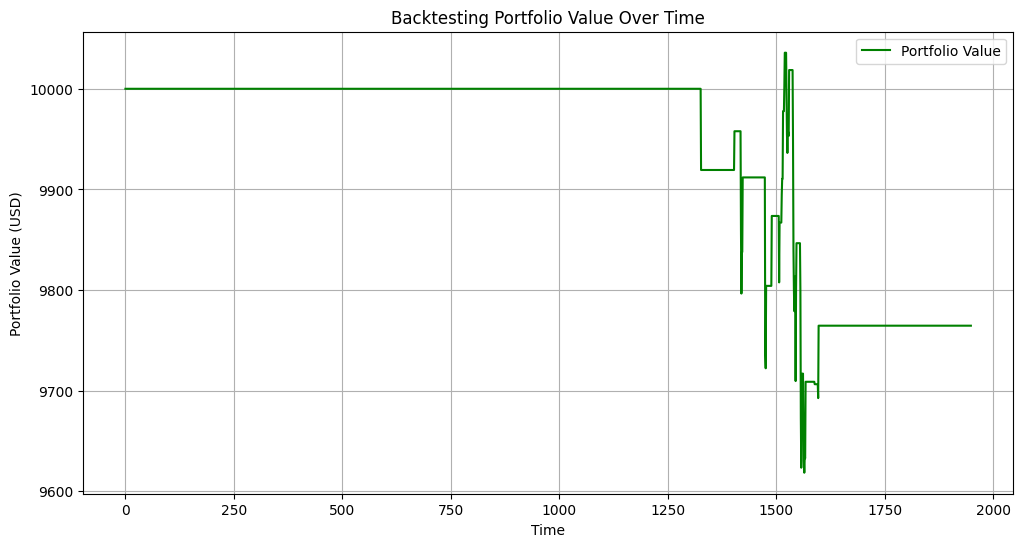

In [21]:
def backtest_strategy(actual_prices, test_prediction_prices, initial_cash=10000):
    cash = initial_cash
    btc = 0
    portfolio_values = []
    actions = []

    for i in range(len(test_prediction_prices) - 1):
        current_price = actual_prices[i]
        next_predicted = test_prediction_prices[i + 1]

        # Action: Buy if price is expected to go up
        if next_predicted > current_price and cash > 0:
            btc = cash / current_price
            cash = 0
            actions.append("BUY")
        # Action: Sell if price is expected to go down
        elif next_predicted < current_price and btc > 0:
            cash = btc * current_price
            btc = 0
            actions.append("SELL")
        else:
            actions.append("HOLD")

        # Calculate portfolio value
        portfolio_value = cash + btc * current_price
        portfolio_values.append(portfolio_value)

    return portfolio_values, actions

# Run the backtest
portfolio_values, actions = backtest_strategy(actual_prices, test_prediction_prices)

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label="Portfolio Value", color="green")
plt.title("Backtesting Portfolio Value Over Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.grid(True)
plt.show()
